In [1]:
import numpy as np
import pandas as pd

In [2]:
#col_names = ["DestinationPort","FlowDuration","TotalFwdPackets","TotalBackwardPackets","TotalLengthofFwdPackets","TotalLengthofBwdPackets","FwdPacketLengthMax","FwdPacketLengthMin","FwdPacketLengthMean","FwdPacketLengthStd","BwdPacketLengthMax","BwdPacketLengthMin","BwdPacketLengthMean","BwdPacketLengthStd","FlowBytes/s","FlowPackets/s","FlowIATMean","FlowIATStd","FlowIATMax","FlowIATMin","FwdIATTotal","FwdIATMean","FwdIATStd","FwdIATMax","FwdIATMin","BwdIATTotal","BwdIATMean","BwdIATStd","BwdIATMax","BwdIATMin","FwdPSHFlags","BwdPSHFlags","FwdURGFlags","BwdURGFlags","FwdHeaderLength","BwdHeaderLength","FwdPackets/s","BwdPackets/s","MinPacketLength","MaxPacketLength","PacketLengthMean","PacketLengthStd","PacketLengthVariance","FINFlagCount","SYNFlagCount","RSTFlagCount","PSHFlagCount","ACKFlagCount","URGFlagCount","CWEFlagCount","ECEFlagCount","Down/UpRatio","AveragePacketSize","AvgFwdSegmentSize","AvgBwdSegmentSize","FwdHeaderLength","FwdAvgBytes/Bulk","FwdAvgPackets/Bulk","FwdAvgBulkRate","BwdAvgBytes/Bulk","BwdAvgPackets/Bulk","BwdAvgBulkRate","SubflowFwdPackets","SubflowFwdBytes","SubflowBwdPackets","SubflowBwdBytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd","min_seg_size_forward","ActiveMean","ActiveStd","ActiveMax","ActiveMin","IdleMean","IdleStd","IdleMax","IdleMin","Label"]
data = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', sep=",")#names=col_names)
data.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.97561,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.97561,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.00000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:

#print(data['Label'].value_counts(sort=1))
print(data.iloc[:,78].value_counts(sort=1))
data.iloc[:,78][data.iloc[:,78] == 'BENIGN'] = 1
data.iloc[:,78][data.iloc[:,78] == 'PortScan'] = 0
data.head(3)

PortScan    158930
BENIGN      127537
Name:  Label, dtype: int64


C:\Users\THOBAN~1\AppData\Local\Temp/ipykernel_21632/3223338475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,78][data.iloc[:,78] == 'BENIGN'] = 1
C:\Users\THOBAN~1\AppData\Local\Temp/ipykernel_21632/3223338475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,78][data.iloc[:,78] == 'PortScan'] = 0


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.97561,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
1,22,1319353,41,44,2664,6954,456,0,64.97561,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
2,22,160,1,1,0,0,0,0,0.00000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1


In [4]:
#import numpy as np
#np.where(data.values >= np.finfo(np.float64).max)
#data.fillna(0)
#data.isnull().any().any()  


In [5]:
#np.isnan(data.values.any())
#data.isnull().any().any()
   #data.isna().sum().sum()
#else:
  #print("no NaN values")   


In [6]:
def clean_dataset(data):
  assert isinstance (data, pd.DataFrame), "df need to be a pd.DataFrame"
  data.dropna(inplace=True)
  indices_to_keep=~data.isin([np.nan, np.inf, -np.inf]).any(1)
  return data[indices_to_keep].astype(np.float64)

data = clean_dataset(data)

In [7]:
with open('readme.txt', 'w') as f:
    f.write(str(data))

In [8]:
Y = data.iloc[:,78]
#Y = data.columns[78]
print(Y)
X = data.drop(data.columns[78],axis=1)
print(X.shape)
print(Y.shape)

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
286462    1.0
286463    1.0
286464    1.0
286465    1.0
286466    1.0
Name:  Label, Length: 286096, dtype: float64
(286096, 78)
(286096,)


In [9]:
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size= 0.3,random_state=20)
len(ytest)
K = math.sqrt(len(ytest))
K

292.965868319161

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=int(K-1))
knn_model.fit(xtrain,ytrain)
knn_model.score(xtest,ytest)

0.9858322944459332

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     47807
         1.0       0.99      0.97      0.98     38022

    accuracy                           0.99     85829
   macro avg       0.99      0.98      0.99     85829
weighted avg       0.99      0.99      0.99     85829



[[47566   241]
 [  975 37047]]




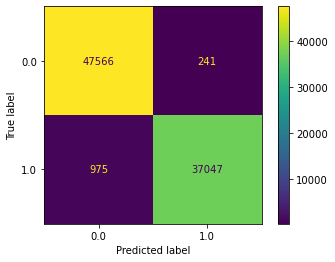

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
Pred = knn_model.predict(xtest)
print(classification_report(ytest,Pred))
plot_confusion_matrix(knn_model,xtest,ytest)
print("\n")
print(confusion_matrix(ytest,Pred))
print("\n")

C:\Users\thobani_radebe\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\thobani_radebe\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


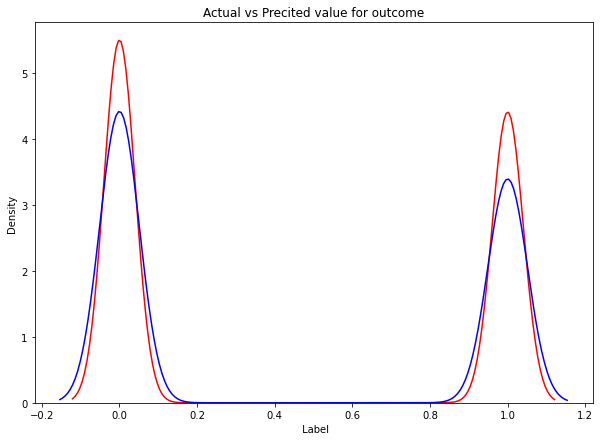

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
ax = sns.distplot(data.iloc[:,78], hist=False, color="r", label="Actual Value")
sns.distplot(Pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()